In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import torch

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot/MAML+Arbiter_5way_5shot_inner_loop.csv')
#norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot__7105/MAML+Arbiter_5way_5shot_filter64_inner_loop.csv')

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
norm_info_train = norm_info[norm_info['phase']=='train']
norm_info_val = norm_info[norm_info['phase']=='val']
norm_info_test= norm_info[norm_info['current_iter']=='test']

In [5]:
per_inner_loop_step = norm_info_train.groupby('num_step').mean()
per_inner_loop_step

,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,layer_dict.conv0.conv.weight_weight_L2norm,layer_dict.conv0.conv.weight_weight_var,layer_dict.conv0.conv.bias_alpha,...,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_grad_var,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_weights_norm,all_weights_var
num_step,,,,,,,,,,,,,,,,,,,,,
0,0.092424,0.000001,3.385387,0.092424,0.000036,-0.000718,132.120072,2.657355,0.002049,9.896335,...,0.064772,0.020089,-0.001116,0.018705,0.009691,0.000025,0.003207,35.638399,23.975772,0.001251
1,0.083190,-0.000020,3.138903,0.083190,0.000030,-0.000718,132.120009,2.657358,0.002049,9.521719,...,0.061909,0.018134,-0.001116,0.019369,0.010040,0.000028,0.003072,34.825621,23.978651,0.001251
2,0.076671,-0.000022,2.940828,0.076671,0.000024,-0.000718,132.119926,2.657359,0.002049,8.953262,...,0.059857,0.016436,-0.001116,0.020078,0.010411,0.000032,0.002862,33.537435,23.981385,0.001251
3,0.073175,-0.000013,2.776197,0.073175,0.000021,-0.000717,132.119827,2.657361,0.002049,8.272479,...,0.058787,0.015381,-0.001116,0.020825,0.010803,0.000038,0.002590,31.885661,23.983895,0.001252
4,0.071346,-0.000014,2.612011,0.071346,0.000020,-0.000717,132.119779,2.657362,0.002049,7.899603,...,0.058285,0.014801,-0.001116,0.021496,0.011156,0.000045,0.002430,30.876203,23.986289,0.001252


In [6]:
per_inner_loop_step['layer_dict.conv0.conv.weight_grad_mean']

num_step
0    0.000001
1   -0.000020
2   -0.000022
3   -0.000013
4   -0.000014
Name: layer_dict.conv0.conv.weight_grad_mean, dtype: float64

In [7]:
per_inner_loop_step['layer_dict.linear.weights_grad_L2norm']

num_step
0    1.873928
1    1.426986
2    0.981845
3    0.687637
4    0.593411
Name: layer_dict.linear.weights_grad_L2norm, dtype: float64

In [8]:
per_inner_loop_step['layer_dict.linear.weights_weight_L2norm']

num_step
0    2.708434
1    2.709198
2    2.710170
3    2.711084
4    2.712079
Name: layer_dict.linear.weights_weight_L2norm, dtype: float64

In [9]:
per_inner_loop_step['layer_dict.conv3.conv.weight_grad_L2norm']

num_step
0    31.804117
1    31.108413
2    29.999081
3    28.544339
4    27.650245
Name: layer_dict.conv3.conv.weight_grad_L2norm, dtype: float64

In [10]:
per_inner_loop_step['layer_dict.conv3.conv.weight_weight_L2norm']

num_step
0    12.839211
1    12.843557
2    12.847612
3    12.851287
4    12.854738
Name: layer_dict.conv3.conv.weight_weight_L2norm, dtype: float64

In [11]:
# specific_column_values = norm_info_train[norm_info_train['num_step'] == 0]
specific_column_values = norm_info_train
specific_column_values

,current_iter,phase,num_step,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,...,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_grad_var,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_weights_norm,all_weights_var
0,0,train,0,9.759704e-01,4.850597e-05,3.748490e+01,9.759704e-01,2.756903e-04,-0.000919,124.334770,...,1.035130e+00,2.678736e-01,-1.862645e-10,0.018479,0.010351,0.000027,0.000012,2.339282,20.008966,0.000866
1,0,train,1,9.664128e-01,-7.574637e-04,3.876104e+01,9.664128e-01,2.697456e-04,-0.000912,124.323196,...,1.021937e+00,2.610888e-01,-1.862645e-10,0.036694,0.020570,0.000106,0.000012,2.328754,20.008968,0.000866
2,0,train,2,9.522593e-01,-3.232700e-04,3.969857e+01,9.522593e-01,2.623550e-04,-0.000908,124.312698,...,1.016908e+00,2.585254e-01,0.000000e+00,0.054774,0.030734,0.000236,0.000012,2.319330,20.008978,0.000866
3,0,train,3,9.325212e-01,-1.753468e-03,3.929538e+01,9.325213e-01,2.486165e-04,-0.000891,124.299377,...,1.013922e+00,2.570096e-01,-3.725290e-10,0.072725,0.040858,0.000417,0.000012,2.307606,20.008997,0.000866
4,0,train,4,9.009876e-01,1.326203e-04,3.693723e+01,9.009876e-01,2.349400e-04,-0.000892,124.290497,...,1.012910e+00,2.564968e-01,-7.450581e-10,0.090492,0.050947,0.000649,0.000011,2.289332,20.009026,0.000866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203447,74999,train,0,7.273200e-10,4.946553e-13,2.786848e-08,7.273200e-10,1.528651e-22,-0.000607,141.936859,...,4.222319e-10,4.456994e-20,-2.466896e-03,0.025589,0.013919,0.000041,0.008018,60.884617,27.638075,0.001643
1203448,74999,train,1,6.079583e-10,-2.667781e-12,1.983164e-08,6.079583e-10,9.986013e-23,-0.000607,141.936859,...,5.063016e-10,6.408531e-20,-2.466896e-03,0.025589,0.013919,0.000041,0.008070,61.085552,27.644487,0.001644
1203449,74999,train,2,1.068346e-09,-4.625484e-12,3.417441e-08,1.068346e-09,3.089499e-22,-0.000607,141.936859,...,7.258787e-10,1.317250e-19,-2.466896e-03,0.025589,0.013919,0.000041,0.007641,59.444103,27.650192,0.001645
1203450,74999,train,3,3.664186e-09,-1.615340e-11,1.207170e-07,3.664186e-09,3.625029e-21,-0.000607,141.936859,...,1.692757e-09,7.163568e-19,-2.466896e-03,0.025589,0.013919,0.000041,0.006774,55.975174,27.655844,0.001646


In [12]:
gr = specific_column_values.groupby('current_iter').mean()

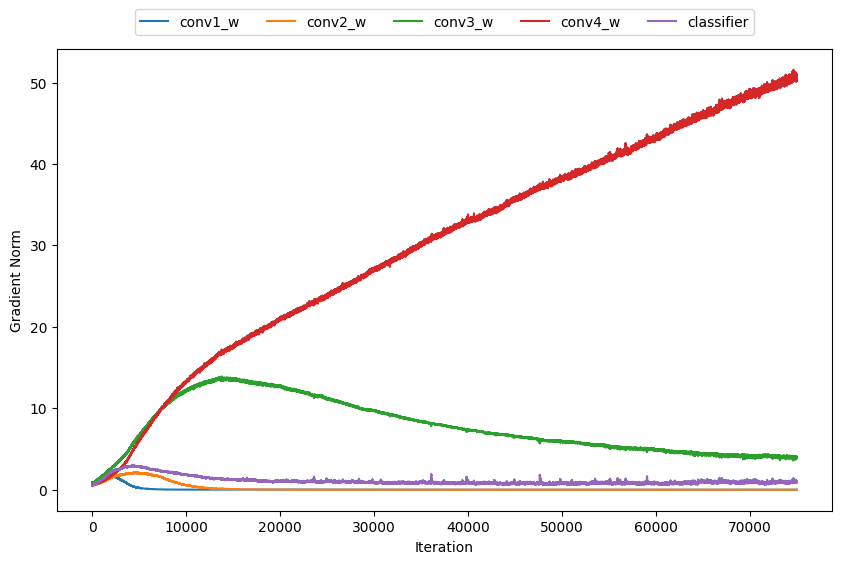

In [13]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_L2norm', 
                    'layer_dict.conv1.conv.weight_grad_L2norm', 
                    'layer_dict.conv2.conv.weight_grad_L2norm',
                    'layer_dict.conv3.conv.weight_grad_L2norm',
                    'layer_dict.linear.weights_grad_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.xlabel('Iteration')  # X 축 라벨 설정
plt.ylabel('Gradient Norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

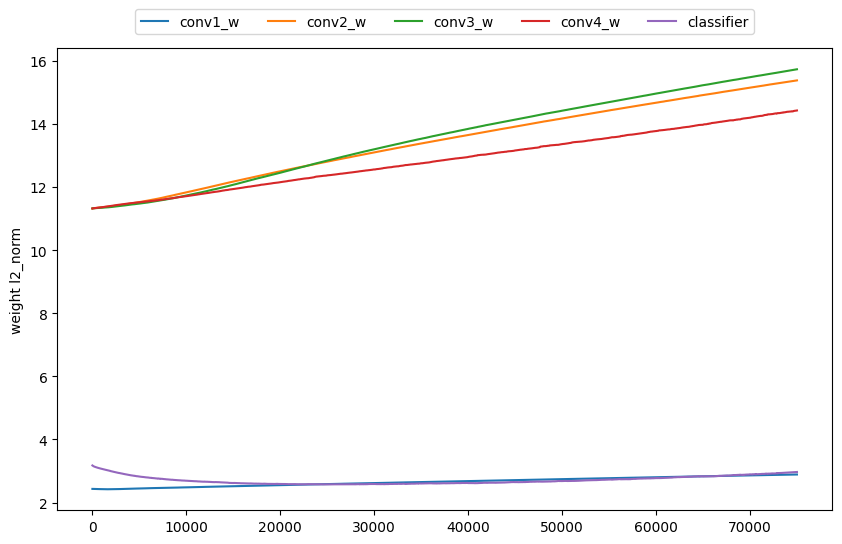

In [14]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_L2norm', 
                    'layer_dict.conv1.conv.weight_weight_L2norm', 
                    'layer_dict.conv2.conv.weight_weight_L2norm',
                    'layer_dict.conv3.conv.weight_weight_L2norm',
                    'layer_dict.linear.weights_weight_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight l2_norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

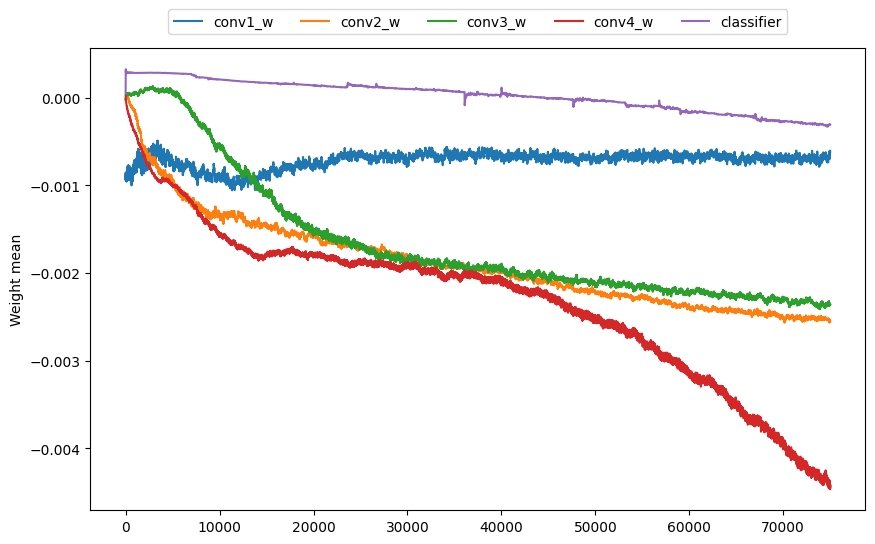

In [15]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_mean', 
                    'layer_dict.conv1.conv.weight_weight_mean', 
                    'layer_dict.conv2.conv.weight_weight_mean',
                    'layer_dict.conv3.conv.weight_weight_mean',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Weight mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

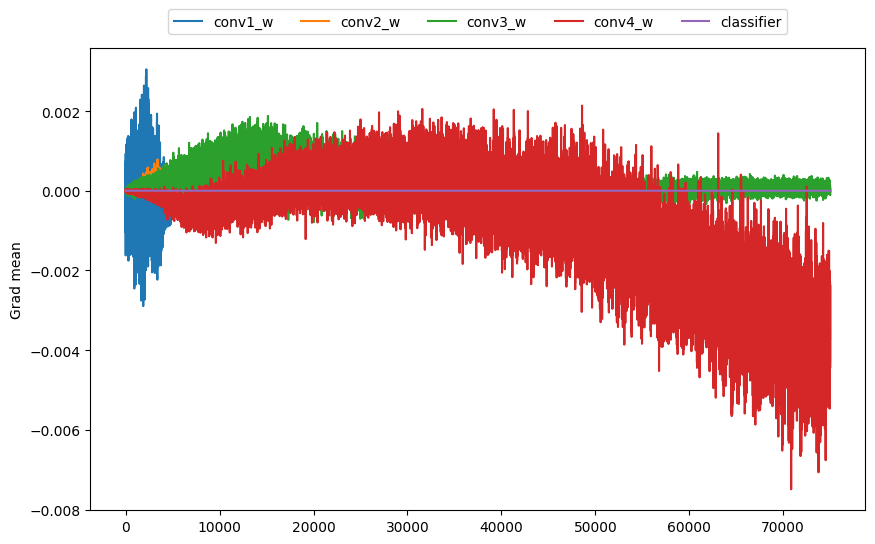

In [16]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_mean', 
                    'layer_dict.conv1.conv.weight_grad_mean', 
                    'layer_dict.conv2.conv.weight_grad_mean',
                    'layer_dict.conv3.conv.weight_grad_mean',
                    'layer_dict.linear.weights_grad_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Grad mean')  

# MAML의 Scale과 맞춘다
#plt.ylim([-0.006, 0.006])

plt.show()  # 그래프 보여주기

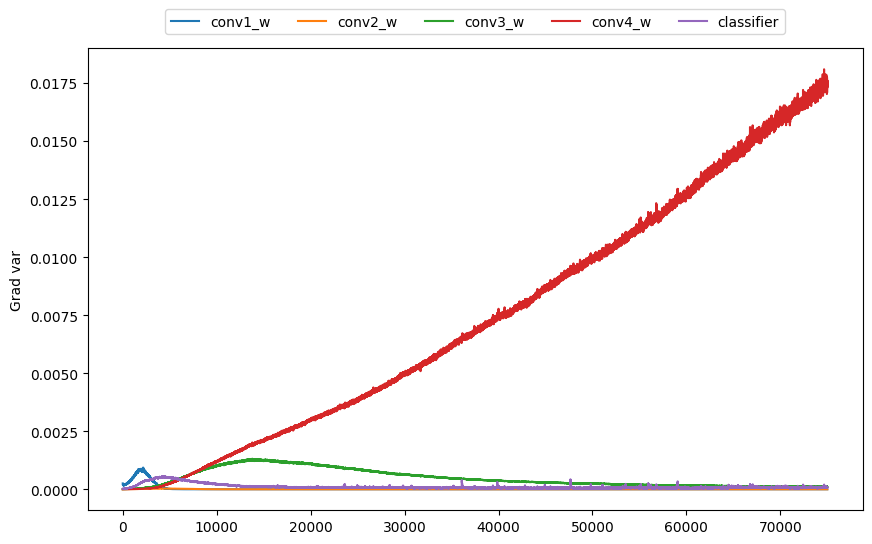

In [21]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_var', 
                    'layer_dict.conv1.conv.weight_grad_var', 
                    'layer_dict.conv2.conv.weight_grad_var',
                    'layer_dict.conv3.conv.weight_grad_var',
                    'layer_dict.linear.weights_grad_var'
]
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier'
]

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Grad var')  

# plt.ylim([0.000, 0.02])

plt.show()  # 그래프 보여주기

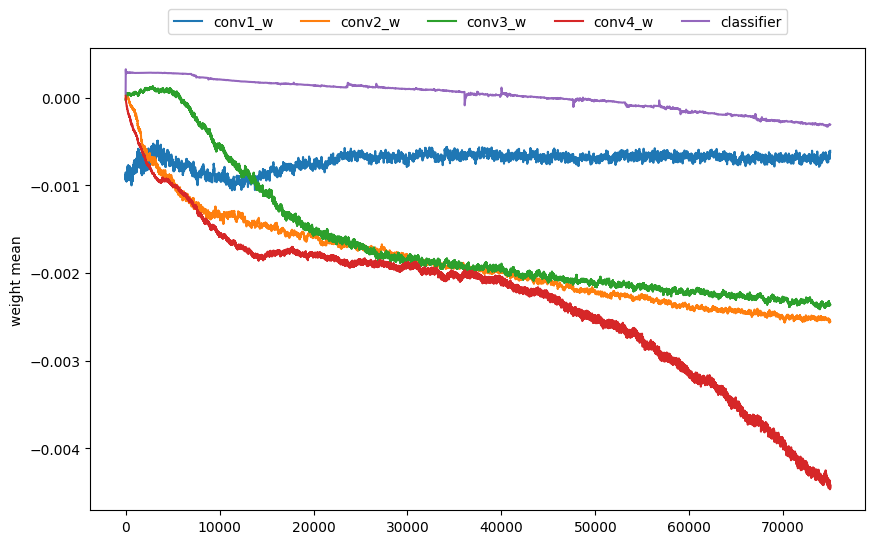

In [18]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_mean', 
                    'layer_dict.conv1.conv.weight_weight_mean', 
                    'layer_dict.conv2.conv.weight_weight_mean',
                    'layer_dict.conv3.conv.weight_weight_mean',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

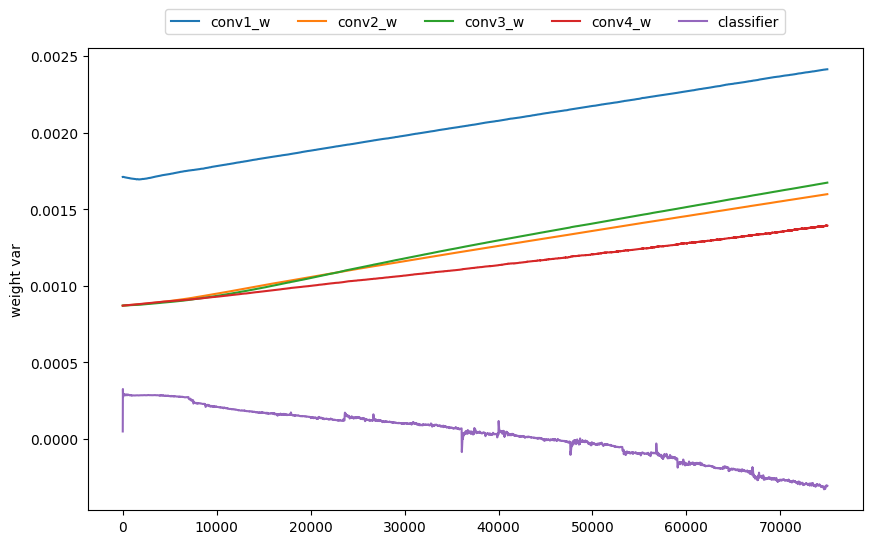

In [19]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_var', 
                    'layer_dict.conv1.conv.weight_weight_var', 
                    'layer_dict.conv2.conv.weight_weight_var',
                    'layer_dict.conv3.conv.weight_weight_var',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight var')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

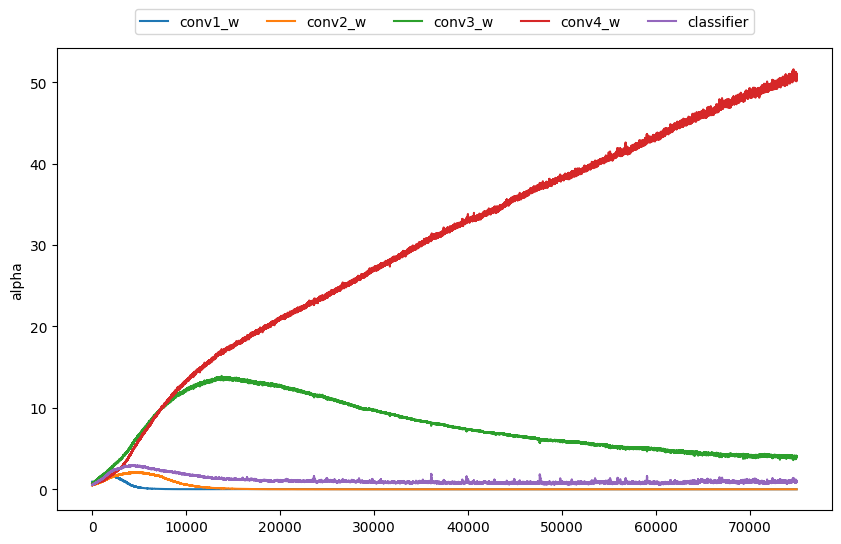

In [20]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_alpha', 
                    'layer_dict.conv1.conv.weight_alpha', 
                    'layer_dict.conv2.conv.weight_alpha',
                    'layer_dict.conv3.conv.weight_alpha',
                    'layer_dict.linear.weights_alpha']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('alpha')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기